# **READING DATA & IMPORTING LIBRARIES**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing needed libararies
import pandas as pd
import numpy as np
from datetime import datetime
import csv
#reading data from an excel file
df=pd.read_csv('/content/drive/MyDrive/Complaints.csv')

# **PREPROCESSING**


## Searching for duplicates and null values



In [ ]:
#cheacking data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASE_ID                 10415 non-null  object 
 1   OFFER_NAME              9122 non-null   object 
 2   CUSTOMER_TYPE           10415 non-null  object 
 3   CUSTOMER_GROUP          9067 non-null   object 
 4   CURRENT_STATUS          10415 non-null  object 
 5   ESCALATION_FLAG         10415 non-null  object 
 6   ESCALATED_GROUP         3360 non-null   object 
 7   OPEN_DATE               10415 non-null  object 
 8   OPEN_USER               10053 non-null  object 
 9   CLOSE_DATE              10296 non-null  object 
 10  CLOSE_GROUP             5525 non-null   object 
 11  CLOSE_USER              9899 non-null   object 
 12  AGE_BRACKET             10296 non-null  float64
 13  ACTUAL_COMPLAINT        10415 non-null  object 
 14  CALLBACK_MECHANISM      3138 non-null 

In [ ]:
#how many null values in each column
df.isnull().sum()

CASE_ID                       0
OFFER_NAME                 1293
CUSTOMER_TYPE                 0
CUSTOMER_GROUP             1348
CURRENT_STATUS                0
ESCALATION_FLAG               0
ESCALATED_GROUP            7055
OPEN_DATE                     0
OPEN_USER                   362
CLOSE_DATE                  119
CLOSE_GROUP                4890
CLOSE_USER                  516
AGE_BRACKET                 119
ACTUAL_COMPLAINT              0
CALLBACK_MECHANISM         7277
RESOLUTION                10336
RESOLUTION_DESCRIPTION    10376
CASE_DESC                  9243
OPEN_GR                    4561
COMPLAINT_TYPE                0
PRODUCT                       0
CASE                          0
dtype: int64

In [ ]:
  #cheacking the total number of null values
  print(df.isnull().sum().sum())
  #the shape of dataframe
  df.shape

57495


(10415, 22)

In [ ]:
#checking if there are any duplicates
df.drop_duplicates().shape

(10415, 22)

In [ ]:
df.head()

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Technical,Internet,Technical complaint
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
heat_df=df.copy(deep=True)
cat_columns = heat_df.select_dtypes(['object']).columns
heat_df[cat_columns] =heat_df[cat_columns].apply(LabelEncoder().fit_transform)

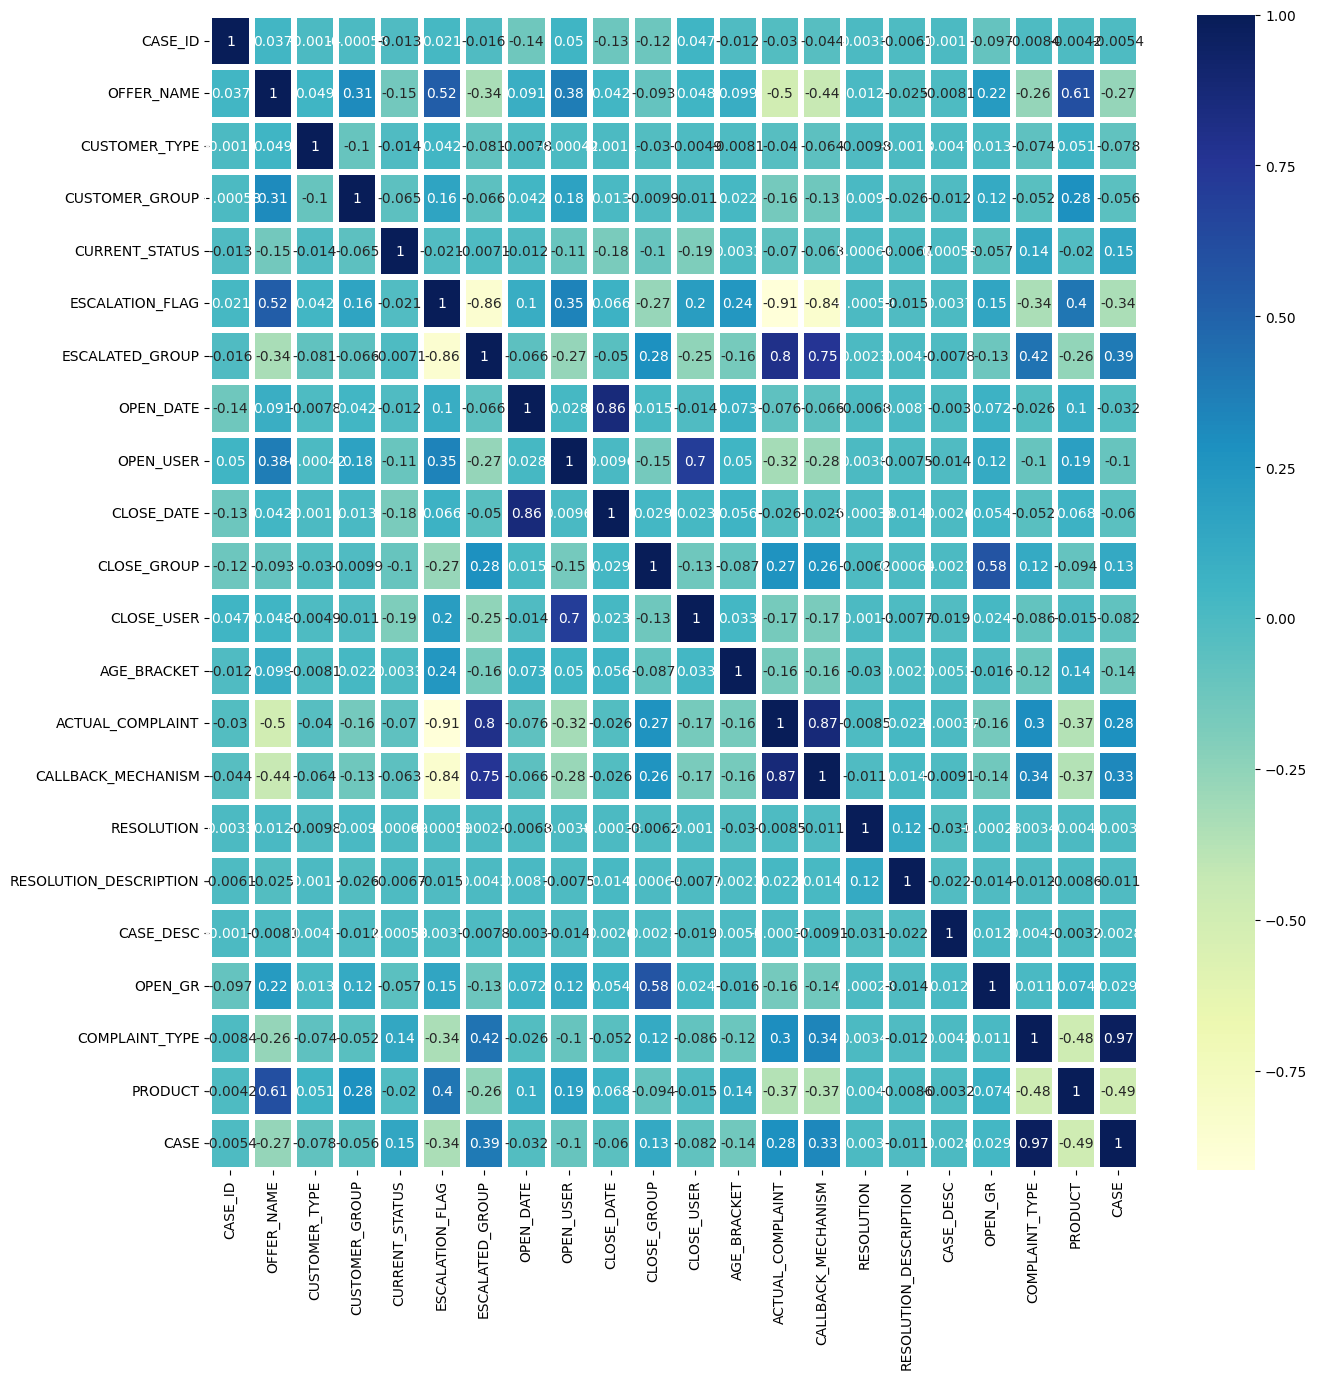

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
import seaborn as sb
dataplot=sb.heatmap(heat_df.corr(),cmap="YlGnBu",annot=True,linewidths=3)

## Filling null values logically

In [ ]:
#dropping with almost all null values
df=df.drop(['RESOLUTION','RESOLUTION_DESCRIPTION','CASE_DESC','CLOSE_DATE'],axis=1)

In [ ]:
#dropping dates that do not make sense
count=0
for i in df['OPEN_DATE']:
  if ':' not in i:
    df=df.drop(count)
  count+=1

In [ ]:
#transforming all dates to one state as datetime
df['OPEN_DATE'] = pd.to_datetime(df.OPEN_DATE)

In [ ]:
#transforming the age bracket to strings so encoding works proberly
df["AGE_BRACKET"] = df["AGE_BRACKET"].apply(lambda x: str(x))
type(df['AGE_BRACKET'][1])

str

## Removing null values using machine learning

In [ ]:
#checking what columns still have null values
df.isnull().sum()

CASE_ID                  0
OFFER_NAME            1293
CUSTOMER_TYPE            0
CUSTOMER_GROUP        1348
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP       7055
OPEN_DATE                0
OPEN_USER              362
CLOSE_GROUP           4890
CLOSE_USER             516
AGE_BRACKET              0
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7277
OPEN_GR               4561
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
#creating a copy of the data frame
copy=df.copy(deep=True)
#dropping the columns that are not needed
copy=copy.drop(['OPEN_DATE','CASE_ID'],axis=1)

In [ ]:
copy.head()

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_USER,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,DANA,F&I_BO,DANA,2.0,Actual Complaint,Phone,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,TCRMService,Mobile_BO,ENNAS,1.0,Not Actual Complaint,Phone,System Administrator,Commercial,Mobile,Commercial claim
2,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,MOUTAZ,CYC_COMMERCAIL_TEAM,MOUTAZ,1.0,User Not Filled,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,MOATH,NaN,MOATH,1.0,User Not Filled,NaN,NaN,Technical,Internet,Technical complaint
4,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,IBRAHIM,CYC_COMMERCAIL_TEAM,IBRAHIM,1.0,User Not Filled,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [ ]:
#creating encodes for each class of the columns
encodes={}
columns=list(copy.columns)
for i in range(len(list(copy.columns))):
  unique=list(copy[columns[i]].unique())
  map=range(len(unique))
  encodes[i]=dict(zip(unique, map))
#creating a clean dataframe
clean=copy.dropna()
#creating a second copy
copy_clean=clean.copy(deep=True)

In [ ]:
#creating decodes for each encode
decodes={}
for i in range(len(list(copy.columns))):
  decodes[i]={v: k for k, v in encodes[i].items()}

In [ ]:
#creating a list containing the null values
null_columns={}
count=0
for i in range(len(list(copy.columns))):
  if copy[columns[i]].isnull().values.any():
    null_columns[count]=columns[i]
    count+=1
null_columns=list(null_columns.values())
null_columns

['OFFER_NAME',
 'CUSTOMER_GROUP',
 'ESCALATED_GROUP',
 'OPEN_USER',
 'CLOSE_GROUP',
 'CLOSE_USER',
 'CALLBACK_MECHANISM',
 'OPEN_GR']

In [ ]:
#encoding the clean dataframe
#for i in range(len(list(copy.columns))):
  #clean=clean.replace({columns[i]:encodes[i]})
#clean.shape

In [ ]:
#importing important libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
def part_one(copy,clean):
    null_frame=copy[pd.isnull(copy[null_columns[i]])].drop(null_columns[i],axis=1)
    test_frame=null_frame.dropna()
    new_list=[x for x in null_columns if x!=null_columns[i]]
    return test_frame,null_frame,new_list
  #in this part:
  #we identify the x values which to be used in predicting null values
  #we have a copy which of it to test if dropped null values will it be empty
  #we create an instance of the columns that are empty except for the one we are predicting for

In [ ]:
def part_two(null_frame,new_list,copy,clean):
  empty=True
  while empty:#while the frame which represent x_predict is empty

  #list that has null sum in each column exepct for the one to predict
    sum_list=np.array([null_frame[[null_columns[null_columns.index(x)]]].isnull().sum() for x in new_list])

    #if there are columns that have null values other than the one we are predicting we take the max null column
    if len(new_list)!=0:
      max_null=sum_list.max()

    #determining the name of the max null column and dropping it
      list_2=[x for x in new_list if null_frame[x].isnull().sum()==max_null]
      null_frame=null_frame.drop(list_2[0],axis=1)

      #this is another test for empty or not
      frame_null=null_frame.dropna()

      #if not empty drop null values and setting empty to false to exit while loop
      if frame_null.empty==False:
        null_frame=null_frame.dropna()
        empty=False
      else:#modyfying new_list if empty
        new_list=[x for x in list(null_frame.columns) if x in null_columns]

    #dropping the column from clean df if existed
    if list_2[0] in clean:
      clean=clean.drop(list_2[0],axis=1)

    #if all columns are not null set empty to False to exit the loop
    if (null_frame.isnull().sum().sum()==0) & (null_frame.empty==False):
      empty=False

In [ ]:
def part_three(null_frame,copy,clean,cons):
  #for k in list(null_frame.columns):#encoding each column
      ##null_frame=null_frame.replace({columns[columns.index(k)]:encodes[columns.index(k)]})
  null_frame=pd.get_dummies(null_frame)
  null_frame=pd.DataFrame(null_frame,columns=cons)
  null_frame=null_frame.fillna(0)
  null_frame=null_frame.drop(columns[columns.index(null_columns[i])],axis=1)
  #splitting x and y
  y=clean[null_columns[i]]
  x=clean.drop(null_columns[i],axis=1)
  #splitting using sklearn for test and train
  X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

  #using DT classifier and testing the accuracy
  #classifier = DecisionTreeClassifier()
  classifier = DecisionTreeClassifier()
  classifier= classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred,average='micro'))
  print("Recall: ",recall_score(y_test,y_pred,average='micro'))
  print("F1_score: ",f1_score(y_test,y_pred,average='micro'))
  return classifier,null_frame

In [ ]:
def part_four(classifier,null_frame,copy,clean):#in this part we predict the null values and replace them
  y_missing=classifier.predict(null_frame)
  missing_df=pd.DataFrame(y_missing,columns=['Decoded Value'])
  missing_df=missing_df.replace({"Decoded Value": decodes[columns.index(null_columns[i])]})
  missing_df['index']=null_frame.index
  for m in range(null_frame.shape[0]):
    df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]

In [ ]:
while df.isnull().sum().sum()>0:
  for i in range(len(null_columns)):

    clean=clean.replace({columns[columns.index(null_columns[i])]:encodes[columns.index(null_columns[i])]})##
    clean=pd.get_dummies(clean)##
    cons=clean.columns##

    test_frame,null_frame,new_list=part_one(copy,clean)

    if test_frame.empty:
      part_two(null_frame,new_list,copy,clean)
    else:
      null_frame=null_frame.dropna()
      print(null_columns[i])

    classifier,null_frame=part_three(null_frame,copy,clean,cons)

    part_four(classifier,null_frame,copy,clean)

    #creating copy and clean again
    copy=df.copy(deep=True)
    copy=copy.drop(['OPEN_DATE','CASE_ID'],axis=1)
    clean=copy.dropna()
    ##for i in range(len(list(copy.columns))):
      ##clean=clean.replace({columns[i]:encodes[i]})
    #removing from null columns if fully filled
    q=1
    for i in [x for x in df.columns if x in null_columns]:
      if df[i].isnull().sum().sum()==0:
        null_columns.remove(i)
        q=-1
        break
    if q==-1:
      break
print('--------------------------------CLEANED SUCCEESSFULLY!!!!--------------------------------------')

OFFER_NAME
Accuracy:  0.7345971563981043
Precision:  0.7345971563981043
Recall:  0.7345971563981043
F1_score:  0.7345971563981043
CUSTOMER_GROUP
Accuracy:  0.8262910798122066
Precision:  0.8262910798122066
Recall:  0.8262910798122066
F1_score:  0.8262910798122065


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]
<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


Accuracy:  0.8325581395348837
Precision:  0.8325581395348837
Recall:  0.8325581395348837
F1_score:  0.8325581395348837


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


Accuracy:  0.7255813953488373
Precision:  0.7255813953488373
Recall:  0.7255813953488373
F1_score:  0.7255813953488373


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


CUSTOMER_GROUP
Accuracy:  0.8744186046511628
Precision:  0.8744186046511628
Recall:  0.8744186046511628
F1_score:  0.8744186046511628


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


Accuracy:  0.5714285714285714
Precision:  0.5714285714285714
Recall:  0.5714285714285714
F1_score:  0.5714285714285714


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


Accuracy:  0.8983050847457628
Precision:  0.8983050847457628
Recall:  0.8983050847457628
F1_score:  0.8983050847457628


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


CLOSE_GROUP
Accuracy:  0.8668280871670703
Precision:  0.8668280871670703
Recall:  0.8668280871670703
F1_score:  0.8668280871670703


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


CLOSE_USER
Accuracy:  0.6113636363636363
Precision:  0.6113636363636363
Recall:  0.6113636363636363
F1_score:  0.6113636363636363


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


CALLBACK_MECHANISM
Accuracy:  0.8253968253968254
Precision:  0.8253968253968254
Recall:  0.8253968253968254
F1_score:  0.8253968253968254


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


OPEN_GR
Accuracy:  0.9425173439048563
Precision:  0.9425173439048563
Recall:  0.9425173439048563
F1_score:  0.9425173439048563


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


Accuracy:  0.9277326106594399
Precision:  0.9277326106594399
Recall:  0.9277326106594399
F1_score:  0.92773261065944


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


CLOSE_USER
Accuracy:  0.7822944896115628
Precision:  0.7822944896115628
Recall:  0.7822944896115628
F1_score:  0.7822944896115628
CALLBACK_MECHANISM


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


Accuracy:  0.8901890189018902
Precision:  0.8901890189018902
Recall:  0.8901890189018902
F1_score:  0.8901890189018902


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


OPEN_GR
Accuracy:  0.9509251810136766
Precision:  0.9509251810136766
Recall:  0.9509251810136766
F1_score:  0.9509251810136766


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


Accuracy:  0.7987220447284346
Precision:  0.7987220447284346
Recall:  0.7987220447284346
F1_score:  0.7987220447284346


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


CALLBACK_MECHANISM
Accuracy:  0.8921725239616614
Precision:  0.8921725239616614
Recall:  0.8921725239616614
F1_score:  0.8921725239616614
OPEN_GR


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


Accuracy:  0.9419152276295133
Precision:  0.9419152276295133
Recall:  0.9419152276295133
F1_score:  0.9419152276295133


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


Accuracy:  0.8979750778816199
Precision:  0.8979750778816199
Recall:  0.8979750778816199
F1_score:  0.8979750778816199


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


OPEN_GR
Accuracy:  0.9618380062305296
Precision:  0.9618380062305296
Recall:  0.9618380062305296
F1_score:  0.9618380062305296


<ipython-input-40-7441e9da01e3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[null_columns[i]][missing_df['index'][m]]=missing_df['Decoded Value'][m]


--------------------------------CLEANED SUCCEESSFULLY!!!!--------------------------------------


In [ ]:
#checking number of null values
df.isnull().sum()

CASE_ID               0
OFFER_NAME            0
CUSTOMER_TYPE         0
CUSTOMER_GROUP        0
CURRENT_STATUS        0
ESCALATION_FLAG       0
ESCALATED_GROUP       0
OPEN_DATE             0
OPEN_USER             0
CLOSE_GROUP           0
CLOSE_USER            0
AGE_BRACKET           0
ACTUAL_COMPLAINT      0
CALLBACK_MECHANISM    0
OPEN_GR               0
COMPLAINT_TYPE        0
PRODUCT               0
CASE                  0
dtype: int64

In [ ]:
df.drop_duplicates().shape

(10370, 18)

# **MACHINE LEARNING MODELS**

In [ ]:
#creating a copy of the dataframe
test=df.copy(deep=True)
#dropping the columns that are not needed
test=test.drop(['CASE_ID','OPEN_DATE'],axis=1)
test.shape

(10396, 16)

In [ ]:
#determening the columns of object type
cat_columns=test.select_dtypes(['object']).columns
cat_columns

Index(['OFFER_NAME', 'CUSTOMER_TYPE', 'CUSTOMER_GROUP', 'CURRENT_STATUS',
       'ESCALATION_FLAG', 'ESCALATED_GROUP', 'OPEN_USER', 'CLOSE_GROUP',
       'CLOSE_USER', 'AGE_BRACKET', 'ACTUAL_COMPLAINT', 'CALLBACK_MECHANISM',
       'OPEN_GR', 'COMPLAINT_TYPE', 'PRODUCT', 'CASE'],
      dtype='object')

In [ ]:
#encoding the columns of the dataframe
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#test[cat_columns]=test[cat_columns].apply(LabelEncoder().fit_transform)

In [ ]:
#encoding the columns of the dataframe
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
test[['CASE']]=test[['CASE']].apply(LabelEncoder().fit_transform)

In [ ]:
test=pd.get_dummies(test)

In [ ]:
#splitting to x and y
y=test['CASE']
x=test.drop('CASE',axis=1)

In [ ]:
#making a report to show the difference between ml models
report=pd.DataFrame(index=["accuracy_score","recall_score","precision_score","f1_score"],columns=["KNN","DT","NB"])

In [ ]:
#DECISION TREE
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
DT_acc=[]
classifer2 = DecisionTreeClassifier()
for i in range(100):
  X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=i)
  classifer2 = classifer2.fit(X_train,y_train)
  y_pred = classifer2.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  DT_acc.append(acc)
  sum_acc = sum_acc + acc
  rec = recall_score(y_test,y_pred,average='micro')
  sum_rec = sum_rec + rec
  pre =  precision_score(y_test,y_pred,average='micro')
  sum_pre = sum_pre + pre
  f1 = f1_score(y_test,y_pred,average='micro')
  sum_f1 = sum_f1 + f1
print('=========================================================')
print('Average Accuracy:', sum_acc/100)
print('Average Recall:', sum_rec/100)
print('Average Precision:', sum_pre/100)
print('Average F1-Score:', sum_f1/100)
report['DT'] = [sum_acc/100, sum_rec/100, sum_pre/100, sum_f1/100]

Average Accuracy: 0.9943125000000006
Average Recall: 0.9943125000000006
Average Precision: 0.9943125000000006
Average F1-Score: 0.9943125000000006


In [ ]:
#KNN
neigh=KNeighborsClassifier(n_neighbors=3)
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
KNN_acc=[]
for i in range(100):
  X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=i)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  KNN_acc.append(acc)
  sum_acc = sum_acc + acc
  rec = recall_score(y_test,y_pred,average='micro')
  sum_rec = sum_rec + rec
  pre =  precision_score(y_test,y_pred,average='micro')
  sum_pre = sum_pre + pre
  f1 = f1_score(y_test,y_pred,average='micro')
  sum_f1 = sum_f1 + f1
print('=========================================================')
print('Average Accuracy:', sum_acc/100)
print('Average Recall:', sum_rec/100)
print('Average Precision:', sum_pre/100)
print('Average F1-Score:', sum_f1/100)
report['KNN'] = [sum_acc/100, sum_rec/100, sum_pre/100, sum_f1/100]

Average Accuracy: 0.9820721153846155
Average Recall: 0.9820721153846155
Average Precision: 0.9820721153846155
Average F1-Score: 0.9820721153846155


In [ ]:
#NB
classifer3 = GaussianNB()
sum_acc = 0
sum_pre = 0
sum_rec = 0
sum_f1 = 0
NB_acc=[]
for i in range(100):
  X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=i)
  classifer3 = classifer3.fit(X_train,y_train)
  y_pred = classifer3.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  NB_acc.append(acc)
  sum_acc = sum_acc + acc
  rec = recall_score(y_test,y_pred,average='micro')
  sum_rec = sum_rec + rec
  pre =  precision_score(y_test,y_pred,average='micro')
  sum_pre = sum_pre + pre
  f1 = f1_score(y_test,y_pred,average='micro')
  sum_f1 = sum_f1 + f1
print('=========================================================')
print('Average Accuracy:', sum_acc/100)
print('Average Recall:', sum_rec/100)
print('Average Precision:', sum_pre/100)
print('Average F1-Score:', sum_f1/100)
report['NB'] = [sum_acc/100, sum_rec/100, sum_pre/100, sum_f1/100]

Average Accuracy: 0.8415480769230769
Average Recall: 0.8415480769230769
Average Precision: 0.8415480769230769
Average F1-Score: 0.8415480769230769


# **VISSUALIZATION**

In [ ]:
report

,KNN,DT,NB
accuracy_score,0.982072,0.994313,0.841548
recall_score,0.982072,0.994313,0.841548
precision_score,0.982072,0.994313,0.841548
f1_score,0.982072,0.994313,0.841548


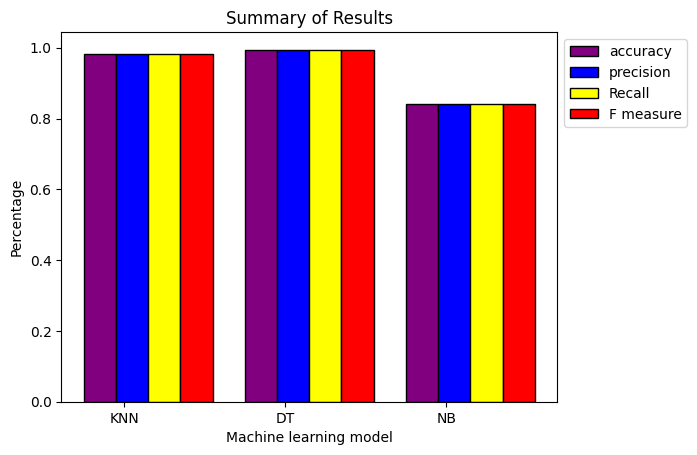

In [ ]:
#PLOTTING RESULTS
X_axis=np.arange(len(list(report.columns)))
plt.bar(X_axis+0.1,list(report.loc['accuracy_score']), color ='purple',width = 0.2, edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.3,list(report.loc['precision_score']), color ='blue',width = 0.2, edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.5,report.loc['recall_score'], color ='yellow',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.7,report.loc['f1_score'], color ='red',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.25,list(report.columns))
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

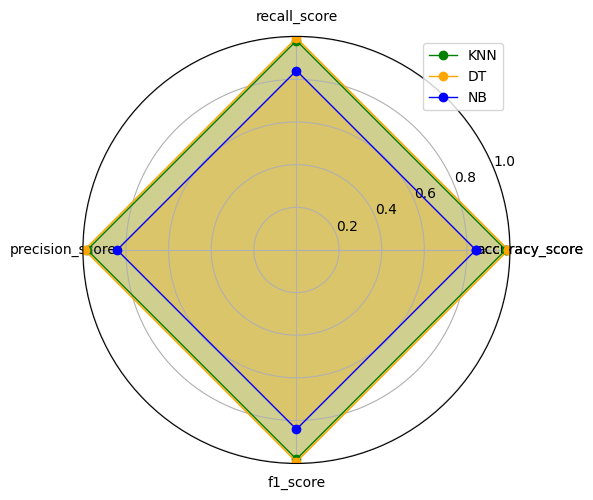

In [ ]:
#VISSUALISING RESULTS
subjects=list(report.index)
KNN=list(report['KNN'])
DT=list(report['DT'])
NB=list(report['NB'])

angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)

#add the first angle at the end of the array to completely describe the circle.
angles=np.concatenate((angles,[angles[0]]))
#Append the first value for all other arrays/lists used for visualization to maintain length consistency
subjects.append(subjects[0])
KNN.append(KNN[0])
DT.append(DT[0])
NB.append(NB[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, polar=True)
ax.plot(angles,KNN, 'o-', color='g', linewidth=1, label='KNN')
ax.fill(angles, KNN, alpha=0.25, color='g')
ax.plot(angles,DT, 'o-', color='orange', linewidth=1, label='DT')
ax.fill(angles, DT, alpha=0.25, color='orange')

ax.plot(angles,NB, 'o-', color='blue', linewidth=1, label='NB')
ax.fill(angles, NB, alpha=0.25, color='orange')
#The spacing of angles and the labels can be customized by using set_thetagrids function.
ax.set_thetagrids(angles * 180/np.pi, subjects)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

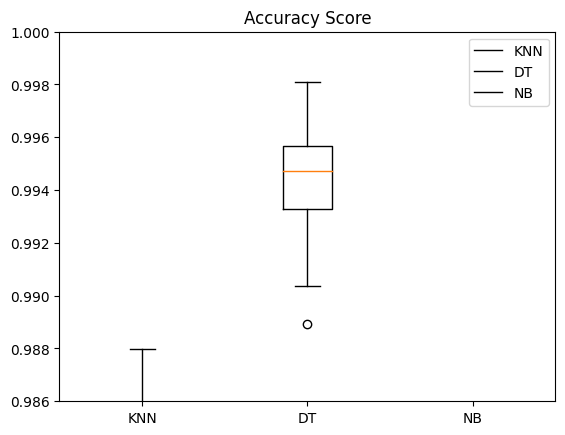

In [ ]:
import matplotlib.pyplot as plt
accuracy=[KNN_acc,DT_acc,NB_acc]
plt.ylim(0.986,1)
plt.boxplot(accuracy)
plt.xticks(X_axis+1,list(report.columns))
plt.title("Accuracy Score")
plt.legend(['KNN','DT','NB'])
plt.show()

In [ ]:
df.to_csv('out.csv')